<a href="https://colab.research.google.com/github/macollipal/challenge-alura-store/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda2.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Silla de oficina,Muebles,283600.0,15300.0,04/08/2021,Izabela de León,Medellín,1,Nequi,1,6.25184,-75.56359
1,Pandereta,Instrumentos musicales,76800.0,2300.0,26/11/2020,Blanca Ramirez,Medellín,3,Tarjeta de crédito,4,6.25184,-75.56359
2,Cama king,Muebles,443300.0,23800.0,22/10/2021,Izabela de León,Pereira,5,Tarjeta de crédito,10,4.81333,-75.69611
3,Cama king,Muebles,906200.0,46400.0,04/05/2022,Maria Alfonso,Cali,5,Tarjeta de crédito,10,3.43722,-76.52250
4,Silla de oficina,Muebles,397800.0,19400.0,26/02/2022,Lucas Olivera,Bogotá,4,Tarjeta de crédito,3,4.60971,-74.08175


#1. Análisis de facturación



Ingreso total de la tienda 1 es: $ 1150880400.0
Ingreso total de la tienda 2 es: $ 1116343500.0
Ingreso total de la tienda 3 es: $ 1098019600.0
Ingreso total de la tienda 4 es: $ 1038375700.0


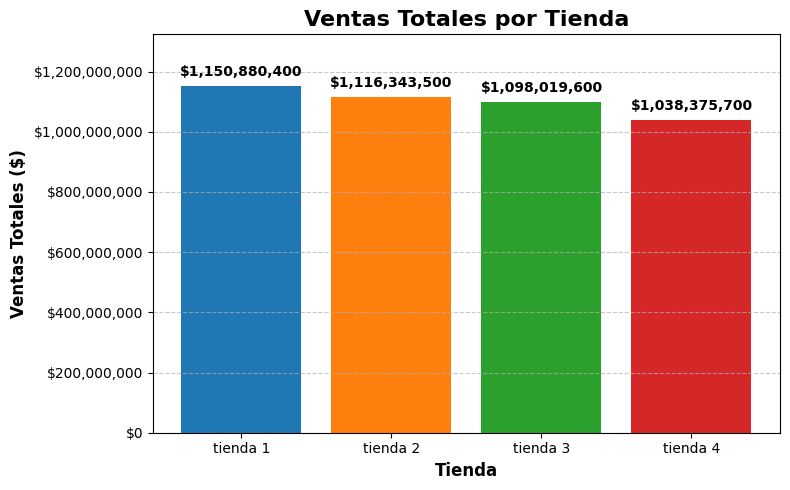

In [ ]:
import matplotlib.pyplot as plt

# Código existente
suma = tienda['Precio'].sum()
suma2 = tienda2['Precio'].sum()
suma3 = tienda3['Precio'].sum()
suma4 = tienda4['Precio'].sum()

lista = ['tienda 1', 'tienda 2', 'tienda 3', 'tienda 4']
ingreso = [suma, suma2, suma3, suma4]

# Impresión de los ingresos
for i in range(len(lista)):
    print('Ingreso total de la', lista[i], 'es: $', ingreso[i])

# VISUALIZACION
# Código agregado para la visualización
plt.figure(figsize=(8, 5))
plt.bar(lista, ingreso, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
plt.title('Ventas Totales por Tienda', fontsize=16, fontweight='bold')
plt.xlabel('Tienda', fontsize=12, fontweight='bold')
plt.ylabel('Ventas Totales ($)', fontsize=12, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0, max(ingreso) * 1.15)  # Dar espacio para las etiquetas

# Personalizar las etiquetas del eje Y con formato de miles
from matplotlib.ticker import FuncFormatter
def formato_miles(x, pos):
    return f'${x:,.0f}'
plt.gca().yaxis.set_major_formatter(FuncFormatter(formato_miles))

# Agregar etiquetas con los valores en cada barra con formato de miles
for i, valor in enumerate(ingreso):
    plt.text(i, valor + (max(ingreso) * 0.02), f'${valor:,.0f}',
             ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

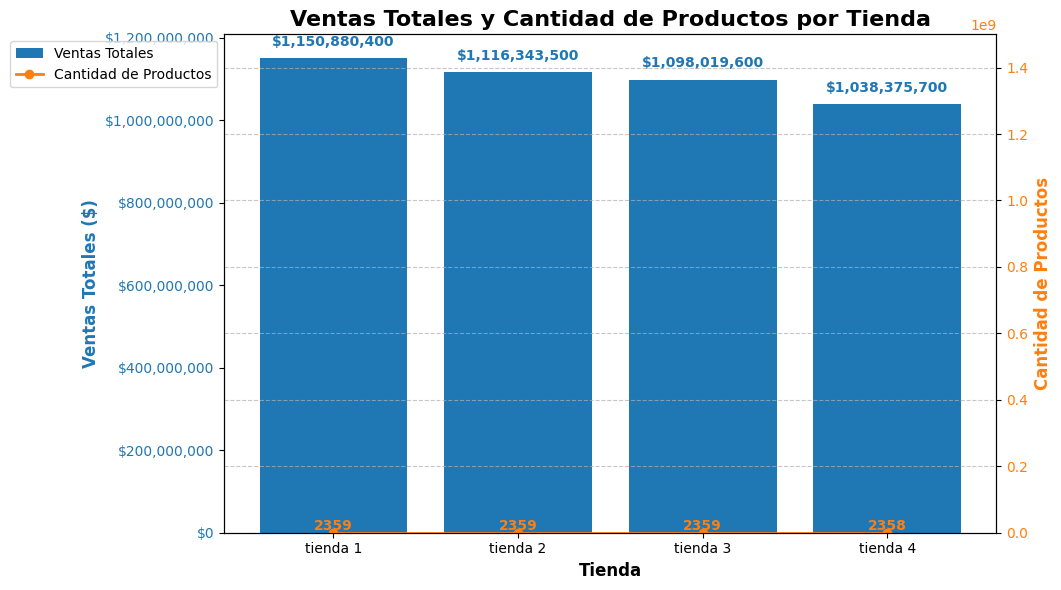

In [ ]:
# prompt: graficar  ventas totales y la cantidad de productos por tienda en un grafico combinado

import matplotlib.pyplot as plt
# Calcular la cantidad de productos por tienda
cantidad_productos = [len(tienda), len(tienda2), len(tienda3), len(tienda4)]

# Crear el gráfico combinado
fig, ax1 = plt.subplots(figsize=(10, 6))

# Gráfico de barras para las ventas totales
ax1.bar(lista, ingreso, color='#1f77b4', label='Ventas Totales')
ax1.set_xlabel('Tienda', fontsize=12, fontweight='bold')
ax1.set_ylabel('Ventas Totales ($)', fontsize=12, fontweight='bold', color='#1f77b4')
ax1.tick_params(axis='y', labelcolor='#1f77b4')
ax1.yaxis.set_major_formatter(FuncFormatter(formato_miles))


# Agregar etiquetas con los valores en cada barra de ventas totales
for i, valor in enumerate(ingreso):
    ax1.text(i, valor + (max(ingreso) * 0.02), f'${valor:,.0f}',
             ha='center', va='bottom', fontsize=10, fontweight='bold', color='#1f77b4')

# Crear un segundo eje Y para la cantidad de productos
ax2 = ax1.twinx()
ax2.plot(lista, cantidad_productos, color='#ff7f0e', marker='o', linestyle='-', linewidth=2, label='Cantidad de Productos')
ax2.set_ylabel('Cantidad de Productos', fontsize=12, fontweight='bold', color='#ff7f0e')
ax2.tick_params(axis='y', labelcolor='#ff7f0e')

# Agregar etiquetas con los valores en cada punto de cantidad de productos
for i, valor in enumerate(cantidad_productos):
    ax2.text(i, valor + 1, str(valor), ha='center', va='bottom', fontsize=10, fontweight='bold', color='#ff7f0e')

plt.ylim(bottom=0, top=1500000000)
# Título y leyenda
plt.title('Ventas Totales y Cantidad de Productos por Tienda', fontsize=16, fontweight='bold')
fig.legend(loc="upper right", bbox_to_anchor=(0,1), bbox_transform=ax1.transAxes)


plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


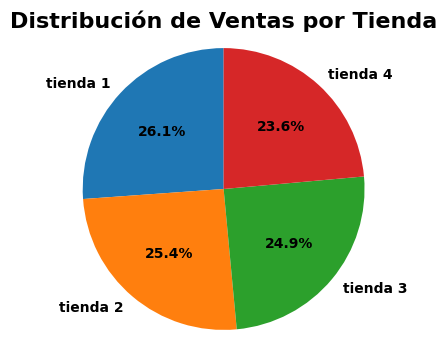

In [ ]:
# prompt: que los label sean en negrita

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# ... (Your existing code to read data and calculate sums)

lista = ['tienda 1', 'tienda 2', 'tienda 3', 'tienda 4']
prc_venta = [suma, suma2, suma3, suma4]

# Impresión de los ingresos (Your existing print statements)

# VISUALIZACION
# Gráfico circular
plt.figure(figsize=(4, 4))
plt.pie(prc_venta, labels=lista, autopct='%1.1f%%', startangle=90, colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'], textprops={'fontsize': 10, 'fontweight': 'bold'}) # Modified line
plt.title('Distribución de Ventas por Tienda', fontsize=16, fontweight='bold')

plt.axis('equal')  # Para asegurar un círculo perfecto

plt.show()


# 2. Ventas por categoría

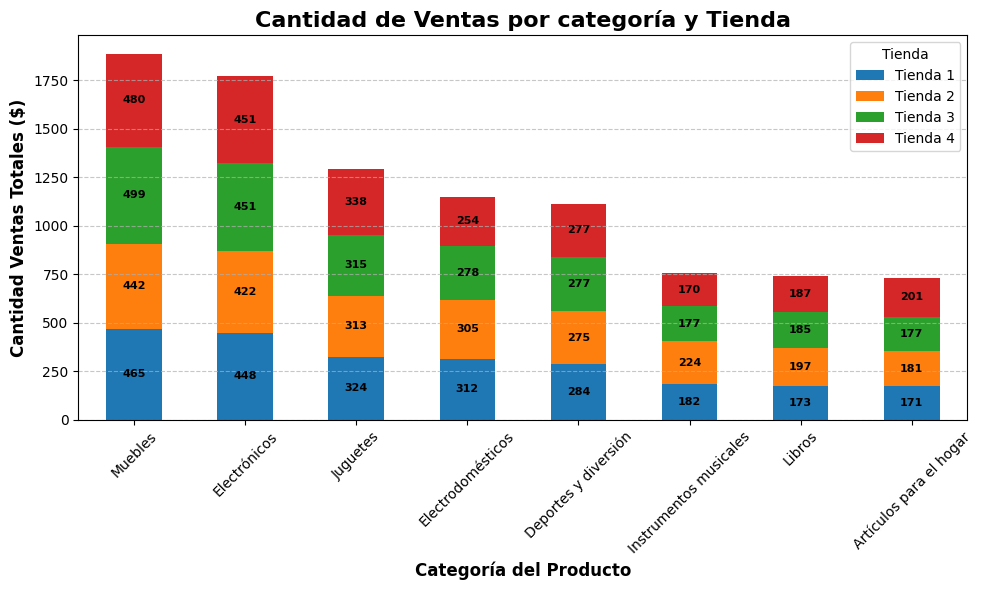

In [ ]:
# prompt: impremir e agregar al data frame el nombre de la tienda, y grafica por  Categoría del Producto aplilado por tienda , de mayor a menor, solo para Electrónicos, mostrar valor en el grafico

import pandas as pd
import matplotlib.pyplot as plt

# ... (Your existing code to read dataframes: tienda, tienda2, tienda3, tienda4)

# Agregar columna 'Tienda' a cada DataFrame
tienda['Tienda'] = 'Tienda 1'
tienda2['Tienda'] = 'Tienda 2'
tienda3['Tienda'] = 'Tienda 3'
tienda4['Tienda'] = 'Tienda 4'

# Concatenar los DataFrames
df_completo = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)

# Filtrar por categoría "Electrónicos"
#df_electronicos = df_completo[df_completo['Categoría del Producto'] == 'Electrónicos']

# Agrupar por categoría y tienda, sumando el precio
ventas_por_categoria_tienda = df_completo.groupby(['Categoría del Producto', 'Tienda'])['Producto'].count().unstack()

# Ordenar por ventas totales de mayor a menor
ventas_por_categoria_tienda = ventas_por_categoria_tienda.sort_values(by=list(ventas_por_categoria_tienda.columns), ascending=False, axis=0)

# VISUALIZACION
# Gráfico de barras apiladas
ventas_por_categoria_tienda.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Cantidad de Ventas por categoría y Tienda', fontsize=16, fontweight='bold')
plt.xlabel('Categoría del Producto', fontsize=12, fontweight='bold')
plt.ylabel('Cantidad Ventas Totales ($)', fontsize=12, fontweight='bold')
plt.xticks(rotation=45)  # Rotar etiquetas del eje x
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Agregar etiquetas de valor a cada barra
for p in plt.gca().patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    #se agrega un limite a mostrar, para graficos pequeños se distorciona el valor
    #if  height > 70000000 :
      #plt.text(x + width / 2, y + height / 2, f'${height:,.0f}', ha='center', va='center', fontsize=8, fontweight='bold')
    plt.text(x + width / 2, y + height / 2, f'{height:,.0f}', ha='center', va='center', fontsize=8, fontweight='bold')
plt.tight_layout()
plt.show()


# 3. Calificación promedio de la tienda

Calificación promedio de la tienda 1: 3.976685036032217
Calificación promedio de la tienda 2: 4.037303942348453
Calificación promedio de la tienda 3: 4.048325561678677
Calificación promedio de la tienda 4: 3.9957591178965224


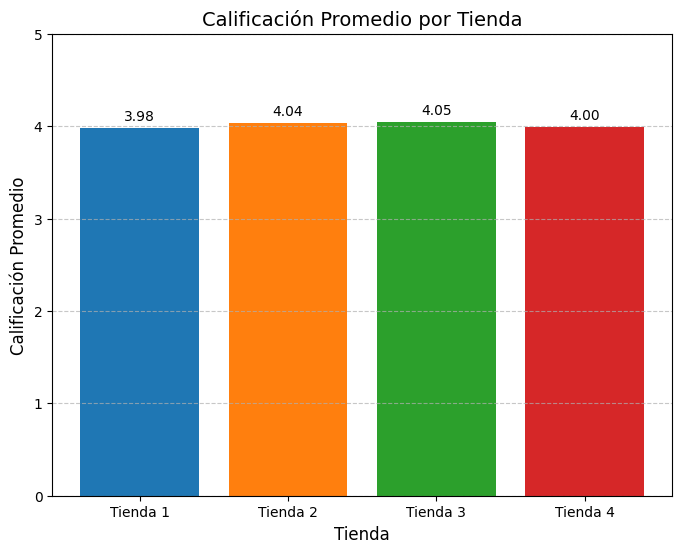

In [ ]:
# prompt: Calificación promedio de la tienda

import matplotlib.pyplot as plt
# ... (Your existing code)

# Calificación promedio de cada tienda, El método .mean() calcula la media aritmética de todos los valores que se encuentran en la columna 'Calificación'.
calificacion_promedio_tienda1 = tienda['Calificación'].mean()
calificacion_promedio_tienda2 = tienda2['Calificación'].mean()
calificacion_promedio_tienda3 = tienda3['Calificación'].mean()
calificacion_promedio_tienda4 = tienda4['Calificación'].mean()

print(f"Calificación promedio de la tienda 1: {calificacion_promedio_tienda1}")
print(f"Calificación promedio de la tienda 2: {calificacion_promedio_tienda2}")
print(f"Calificación promedio de la tienda 3: {calificacion_promedio_tienda3}")
print(f"Calificación promedio de la tienda 4: {calificacion_promedio_tienda4}")

# VISUALIZACION
# Gráfico de barras para la calificación promedio
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
calificaciones_promedio = [calificacion_promedio_tienda1, calificacion_promedio_tienda2, calificacion_promedio_tienda3, calificacion_promedio_tienda4]

plt.figure(figsize=(8, 6))
plt.bar(tiendas, calificaciones_promedio, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
plt.title('Calificación Promedio por Tienda', fontsize=14)
plt.xlabel('Tienda', fontsize=12)
plt.ylabel('Calificación Promedio', fontsize=12)
plt.ylim(0, 5)  # Establecer límite del eje y de 0 a 5
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Agregar etiquetas de valor a cada barra
for i, calificacion in enumerate(calificaciones_promedio):
    plt.text(i, calificacion + 0.05, f'{calificacion:.2f}', ha='center', va='bottom', fontsize=10)


plt.show()


# 4. Productos más y menos vendidos

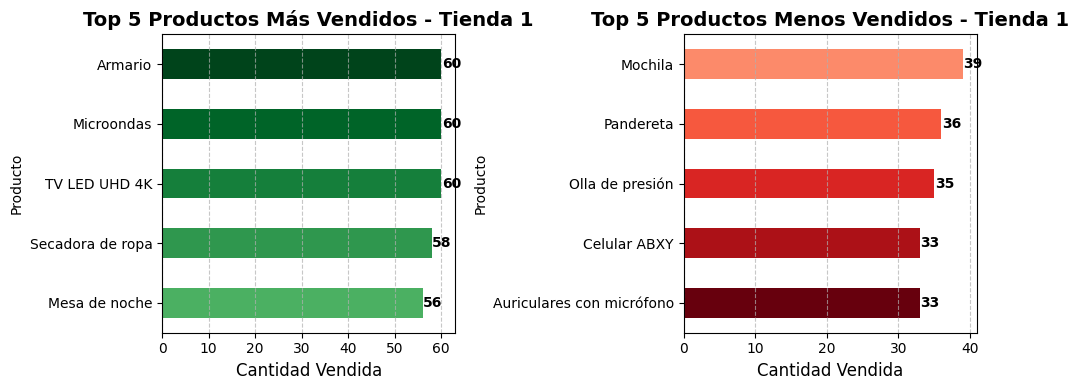

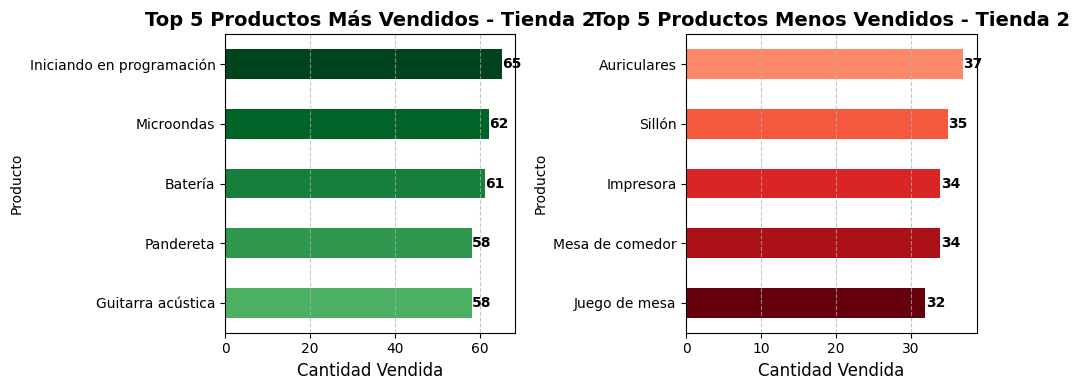

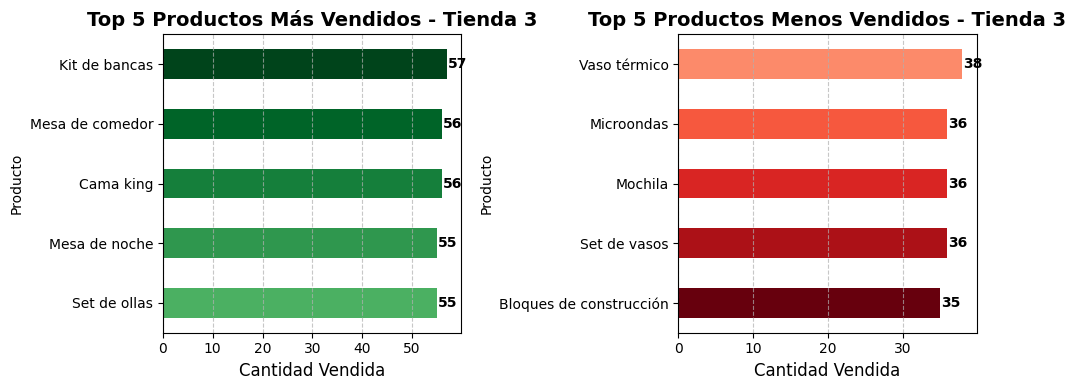

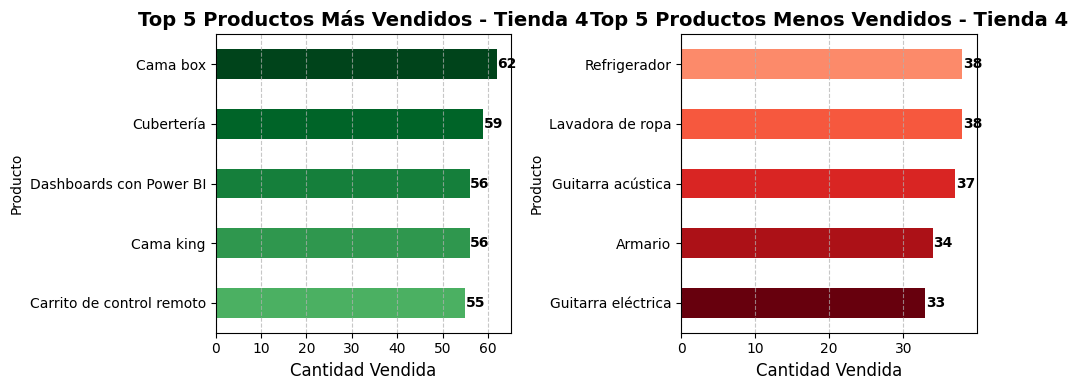

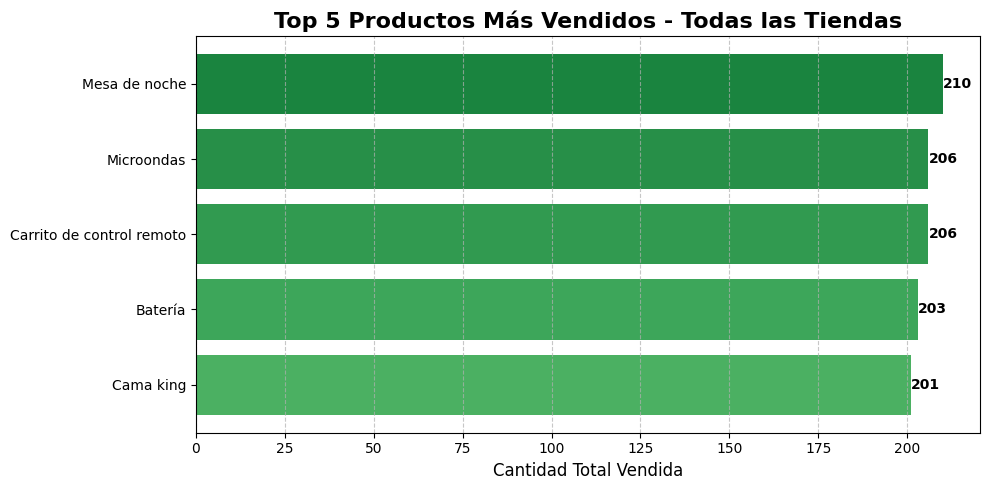

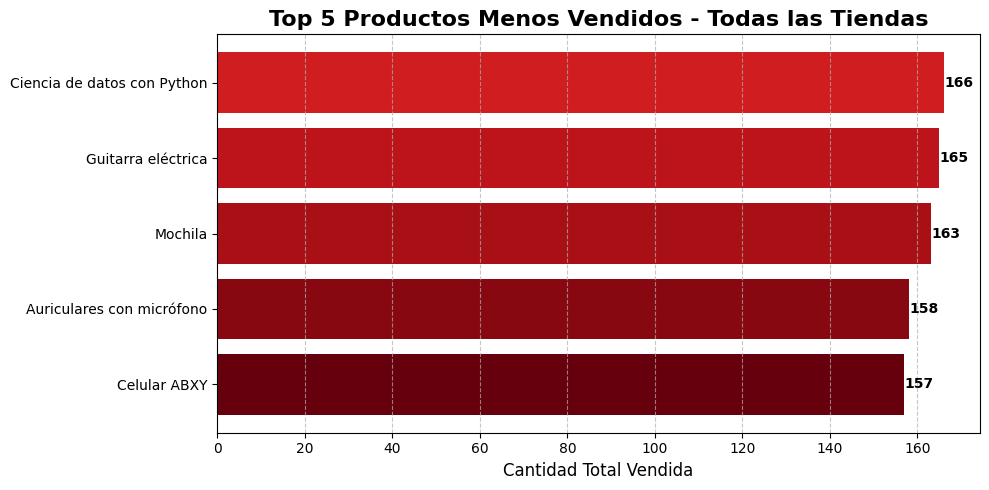

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Código existente - Conteo de productos por tienda
Contar = tienda['Producto'].value_counts()
Contar2 = tienda2['Producto'].value_counts()
Contar3 = tienda3['Producto'].value_counts()
Contar4 = tienda4['Producto'].value_counts()

lista_tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
conteos_productos = [Contar, Contar2, Contar3, Contar4]

# Función para crear visualizaciones de top ten
def visualizar_top_productos(tiendas, datos, n=5):
    """
    Crea visualizaciones para los productos más y menos vendidos

    Parameters:
    tiendas: Lista con nombres de tiendas
    datos: Lista con Series de conteos de productos
    n: Número de productos a mostrar en cada categoría
    """
    # Crear figura con subplots (filas para tiendas, columnas para más/menos vendidos)
    fig, axes = plt.subplots(len(tiendas), 2, figsize=(10, 4*len(tiendas)))

    colors_mas = plt.cm.Greens(np.linspace(0.6, 1, n))  # Escala de verdes para más vendidos
    colors_menos = plt.cm.Reds(np.linspace(1, 0.4, n))  # Escala de rojos para menos vendidos

    for i, (tienda, conteo) in enumerate(zip(tiendas, datos)):
        # Productos más vendidos
        top_mas = conteo.nlargest(n)
        top_mas = top_mas.sort_values(ascending=True)  # Para que las barras vayan de menor a mayor

        # Productos menos vendidos
        top_menos = conteo.nsmallest(n)

        # Gráfico productos más vendidos
        ax_mas = axes[i, 0] if len(tiendas) > 1 else axes[0]
        top_mas.plot(kind='barh', ax=ax_mas, color=colors_mas)
        ax_mas.set_title(f'Top {n} Productos Más Vendidos - {tienda}', fontsize=14, fontweight='bold')
        ax_mas.set_xlabel('Cantidad Vendida', fontsize=12)
        ax_mas.grid(axis='x', linestyle='--', alpha=0.7)

        # Añadir etiquetas de valores
        for j, v in enumerate(top_mas):
            ax_mas.text(v + 0.1, j, str(v), va='center', fontweight='bold')

        # Gráfico productos menos vendidos
        ax_menos = axes[i, 1] if len(tiendas) > 1 else axes[1]
        top_menos.plot(kind='barh', ax=ax_menos, color=colors_menos)
        ax_menos.set_title(f'Top {n} Productos Menos Vendidos - {tienda}', fontsize=14, fontweight='bold')
        ax_menos.set_xlabel('Cantidad Vendida', fontsize=12)
        ax_menos.grid(axis='x', linestyle='--', alpha=0.7)

        # Añadir etiquetas de valores
        for j, v in enumerate(top_menos):
            ax_menos.text(v + 0.1, j, str(v), va='center', fontweight='bold')

    plt.tight_layout()
    return fig

# Visualizar productos más y menos vendidos para cada tienda
for i, tienda_nombre in enumerate(lista_tiendas):
    fig = visualizar_top_productos([tienda_nombre], [conteos_productos[i]])
    plt.show()

# También podemos crear una visualización consolidada de todas las tiendas
# Combinar datos para un análisis general
todos_productos = pd.concat([
    Contar.rename('Tienda 1'),
    Contar2.rename('Tienda 2'),
    Contar3.rename('Tienda 3'),
    Contar4.rename('Tienda 4')
], axis=1)

# Llenar NaN con ceros para productos que no existen en algunas tiendas
todos_productos = todos_productos.fillna(0)

# Calcular el total de ventas por producto en todas las tiendas
todos_productos['Total'] = todos_productos.sum(axis=1)

# Obtener los 5 productos más vendidos en general
top_general = todos_productos['Total'].nlargest(5)
top_general = top_general.sort_values(ascending=True)

# Obtener los 5 productos menos vendidos en general
bottom_general = todos_productos['Total'].nsmallest(5)

# Crear gráfico para top 10 general
plt.figure(figsize=(10, 5))
plt.barh(top_general.index, top_general.values, color=plt.cm.Greens(np.linspace(0.6, 1, 10)))
plt.title('Top 5 Productos Más Vendidos - Todas las Tiendas', fontsize=16, fontweight='bold')
plt.xlabel('Cantidad Total Vendida', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Añadir etiquetas de valores
for i, v in enumerate(top_general.values):
    plt.text(v + 0.1, i, str(int(v)), va='center', fontweight='bold')

plt.tight_layout()
plt.show()

# Crear gráfico para bottom 10 general
plt.figure(figsize=(10, 5))
plt.barh(bottom_general.index, bottom_general.values, color=plt.cm.Reds(np.linspace(1, 0.4, 10)))
plt.title('Top 5 Productos Menos Vendidos - Todas las Tiendas', fontsize=16, fontweight='bold')
plt.xlabel('Cantidad Total Vendida', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Añadir etiquetas de valores
for i, v in enumerate(bottom_general.values):
    plt.text(v + 0.1, i, str(int(v)), va='center', fontweight='bold')

plt.tight_layout()
plt.show()

 Gráfico de dispersión Precio vs. Calificación

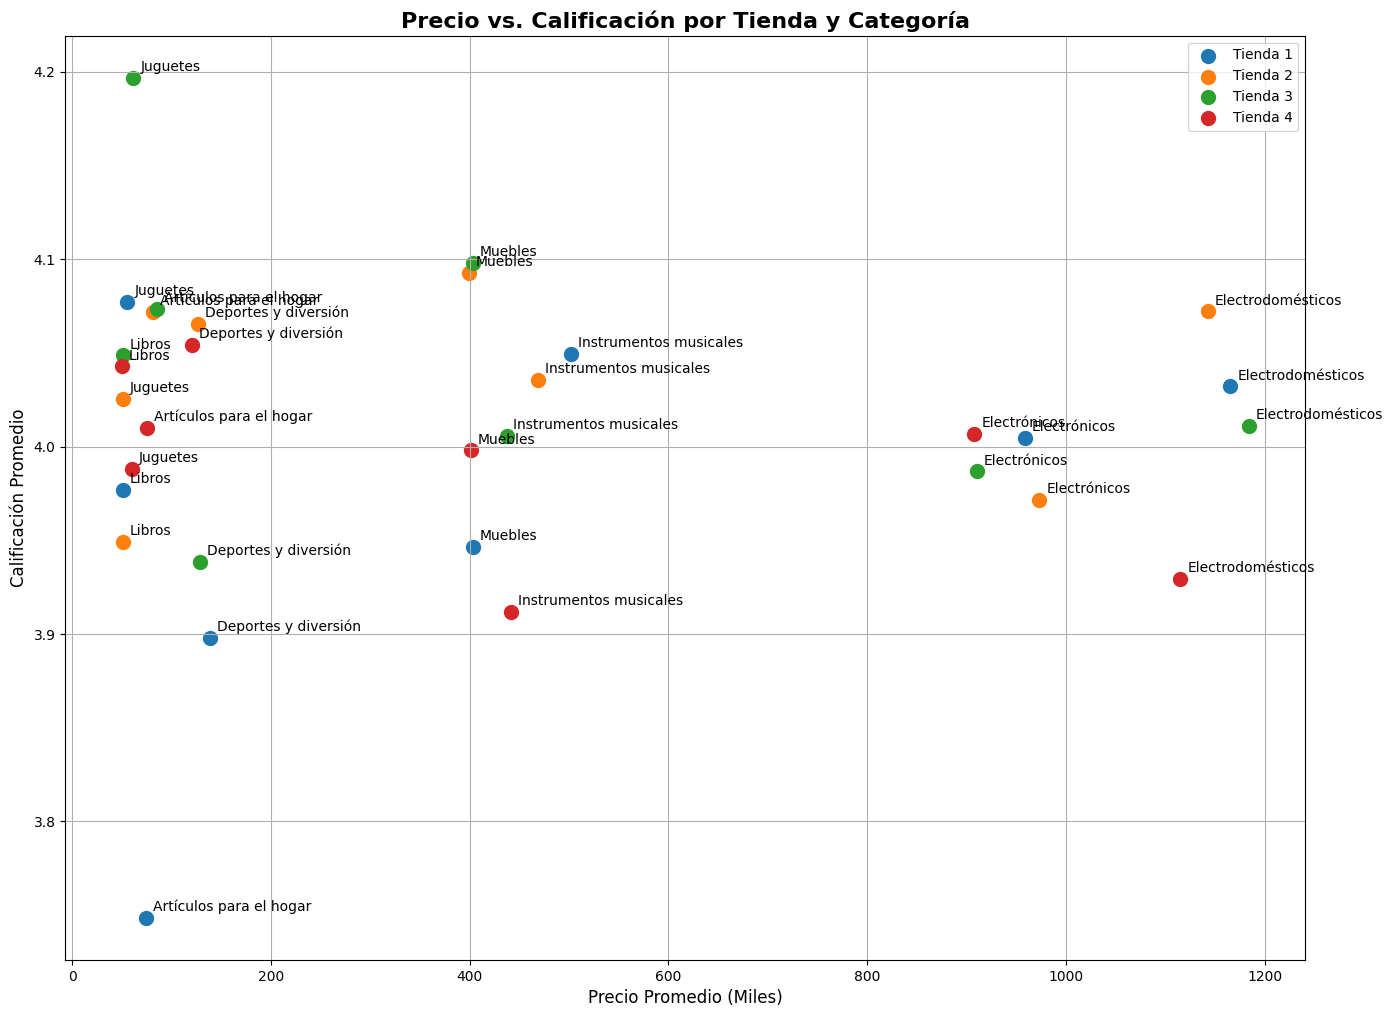

In [ ]:
# prompt: necesito un listado y grafico de dispersion por tienda de Precio vs. Calificación , donde los puntos sean las categorias , el eje y calificacion promedio y el eje x precio promedio entero en miles

import matplotlib.pyplot as plt
# Agrupar por tienda, categoría, calcular precio y calificación promedio
precio_calif_promedio = df_completo.groupby(['Tienda', 'Categoría del Producto'])[['Precio', 'Calificación']].mean()

# Resetear el índice para facilitar el acceso a las columnas
precio_calif_promedio = precio_calif_promedio.reset_index()

# Crear el gráfico de dispersión
plt.figure(figsize=(16, 12))

for tienda in precio_calif_promedio['Tienda'].unique():
    subset = precio_calif_promedio[precio_calif_promedio['Tienda'] == tienda]
    plt.scatter(subset['Precio'] / 1000, subset['Calificación'], label=tienda, s=100)  # Dividir precio por 1000

# Personalización del gráfico
plt.title('Precio vs. Calificación por Tienda y Categoría', fontsize=16, fontweight='bold')
plt.xlabel('Precio Promedio (Miles)', fontsize=12)
plt.ylabel('Calificación Promedio', fontsize=12)
plt.grid(True)
plt.legend()


# Agregar anotaciones de las categorías a los puntos
for index, row in precio_calif_promedio.iterrows():
    plt.annotate(row['Categoría del Producto'], (row['Precio'] / 1000, row['Calificación']), textcoords="offset points", xytext=(5,5), ha='left')

plt.show()


# Crear un listado (DataFrame) con los datos
listado = precio_calif_promedio[['Tienda', 'Categoría del Producto', 'Precio', 'Calificación']]
#listado


# 5. Envío promedio por tienda

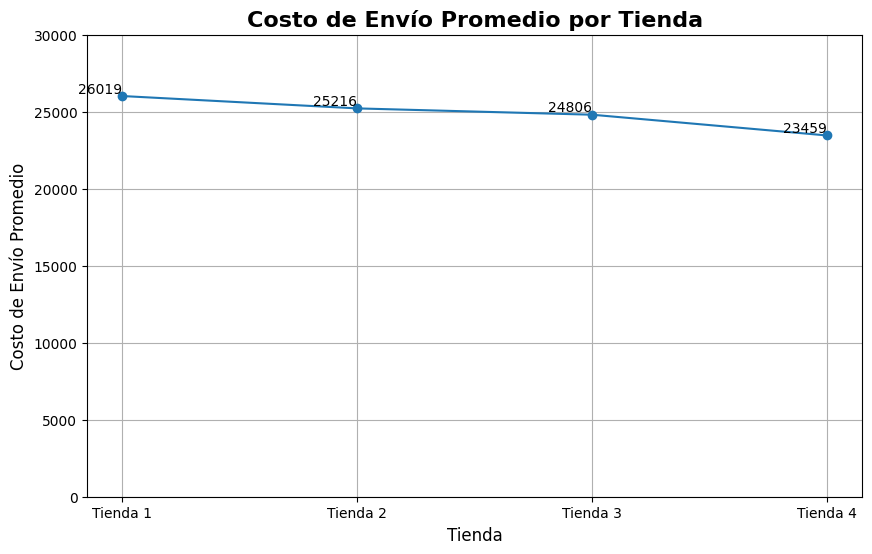

In [ ]:
# prompt: mostrar Costo de envío promedio por tienda grafico lineas

import matplotlib.pyplot as plt
# Agrupar por tienda y calcular el costo de envío promedio
costo_envio_promedio = df_completo.groupby('Tienda')['Costo de envío'].mean()

# Crear el gráfico de líneas
plt.figure(figsize=(10, 6))
plt.plot(costo_envio_promedio.index, costo_envio_promedio.values, marker='o', linestyle='-')
plt.title('Costo de Envío Promedio por Tienda', fontsize=16, fontweight='bold')
plt.xlabel('Tienda', fontsize=12)
plt.ylabel('Costo de Envío Promedio', fontsize=12)
plt.grid(True)
plt.ylim(bottom=0, top=30000)

# Agregar etiquetas de valor a cada punto
for i, costo in enumerate(costo_envio_promedio.values):
    plt.text(i, costo + 0.1, f'{costo:.0f}', ha='right', va='bottom', fontsize=10)

plt.show()


#Análisis para Determinar la Tienda con Menor Desempeño

Basándose en los gráficos, presento un análisis detallado del rendimiento de las cuatro tiendas:

1. Facturación Total por Tienda

  Tienda 1: $1,150,880,400 (26.1% del total)

  Tienda 2: $1,116,343,500 (25.4% del total)   

  Tienda 3: $1,098,019,600 (24.9% del total)  

  Tienda 4: $1,038,375,700 (23.6% del total)  
  
  La Tienda 4 tiene claramente la menor facturación, con más de $$112 millones menos que la tienda líder y aproximadamente $60 millones menos que la Tienda 3.

2. Categorías Más Populares por Tienda

  Analizando el gráfico de cantidad de ventas por categoría:

  Tienda 1: Destaca en Muebles (465) y Electrónicos (448)  
  Tienda 2: Tiene buen desempeño en Muebles (442) y Electrónicos (422)  
  Tienda 3: Fuerte en Muebles (499) y Electrónicos (451)  
  Tienda 4: Aunque no es débil, tiene números menores en las categorías principales: Muebles (480) y Electrónicos (451)

  La Tienda 4 no lidera en ninguna categoría principal de productos.

3. Calificación Promedio de Clientes

  Tienda 3: 4.05/5  
  Tienda 2: 4.04/5  
  Tienda 4: 4.00/5  
  Tienda 1: 3.98/5

  Aquí la Tienda 1 tiene la calificación más baja, pero la diferencia es mínima entre todas las tiendas (solo 0.07 puntos).

4. Productos Más y Menos Vendidos

  **Los productos más vendidos en todas las tiendas son**: Mesa de noche (210), Microondas (206), Carrito de control remoto (206), Batería (203) y Cama king (201).
  **Los productos menos vendidos son**: Ciencia de datos con Python (166), Guitarra eléctrica (165), Mochila (163), Auriculares con micrófono (158) y Celular ABXY (157).  
  Es interesante que incluso los productos "menos vendidos" tienen volúmenes de venta relativamente altos (más de 150 unidades).

5. Costo Promedio de Envío

  Tienda 1: $26,019

  Tienda 2: $25,216

  Tienda 3: $24,806

  Tienda 4: $23,459


  La Tienda 4 tiene el costo de envío más bajo, lo que es un punto positivo, pero no suficiente para compensar otras áreas de rendimiento inferior.  

  ## Recomendación.  
  Basado en este análisis integral, recomiendo al Sr. Juan vender la Tienda 4 por las siguientes razones:

*Facturación más baja*: Genera $112 millones menos que la tienda líder y es la que menos contribuye a los ingresos totales (solo 23.6%).
Desempeño menor en categorías clave: No lidera en ninguna categoría principal de productos.

*Calificación promedio no destacada*: Aunque no es la peor calificada, su calificación de 4.00 no es un factor diferenciador suficiente.
Menor potencial de crecimiento: Al comparar los datos entre tiendas, la Tienda 4 muestra un desempeño consistentemente inferior en múltiples métricas.
Ventaja en costos de envío insuficiente: Aunque tiene los costos de envío más bajos, esta ventaja no compensa su menor rendimiento en ventas totales.

### Vendiendo la Tienda 4, el Sr. Juan podrá:

Conservar las tres tiendas con mejor rendimiento.  
Mantener más del 75% de su facturación actual.  
Utilizar el capital de la venta para invertir en su nuevo negocio.  
Simplificar sus operaciones concentrándose en las tiendas más rentables.  

Esta decisión le permitirá optimizar su portafolio comercial mientras obtiene liquidez para su nueva inversión.